# Descripción del DATASET

El Dataset de customer_purchases contiene información sobre compras hechas por clientes, con atributos que proporcionan:
- Datos del cliente: edad, antiguedad, género.
- Datos del producto: categoría, color, rating promedio, precio, num rating, años desde su lanzamiento.
- Detalles de compra: que dispositivo se uso, fecha, rating del cliente, label.




# Resumen estadístico 
Analizar variables y ver que tipo son.

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("../datasets/customer_purchases/customer_purchases_train_preprocessed.csv")



print("=== INFORMACIÓN GENERAL ===")
print(df.info())
print("\n")


=== INFORMACIÓN GENERAL ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7289 entries, 0 to 7288
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   purchase_id               7289 non-null   int64  
 1   customer_id_num           7289 non-null   int64  
 2   customer_age              7289 non-null   int64  
 3   customer_gender           7289 non-null   int64  
 4   item_id_num               7289 non-null   int64  
 5   item_title_num            7289 non-null   int64  
 6   item_category_num         6613 non-null   float64
 7   item_price                7289 non-null   float64
 8   item_color                7289 non-null   int64  
 9   item_avg_rating           7244 non-null   float64
 10  item_num_ratings          7289 non-null   int64  
 11  item_years_since_release  7289 non-null   float64
 12  purchase_timestamp        7289 non-null   object 
 13  customer_item_views       7289 non-

# Distribución de Datos
Relaciones entre datos para ver coincidencias de compra.

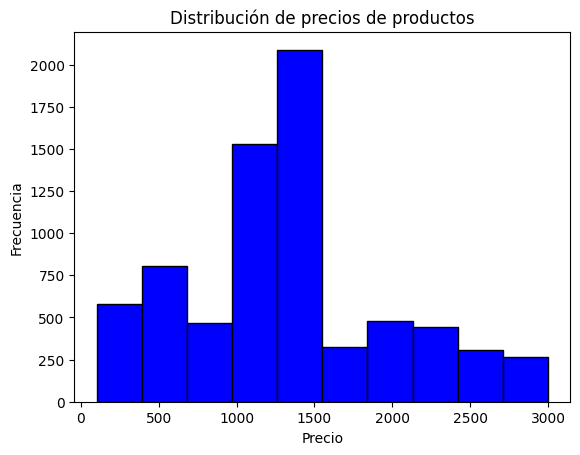

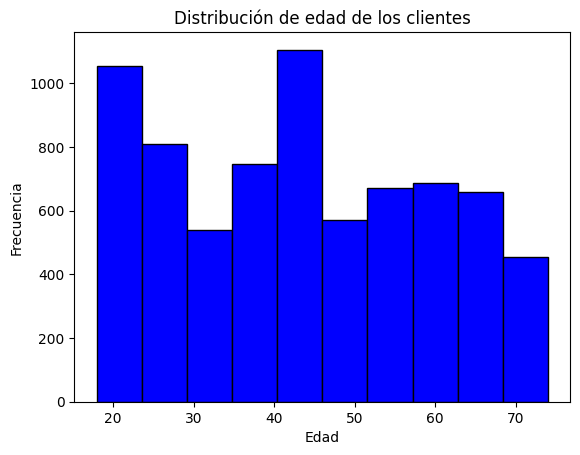

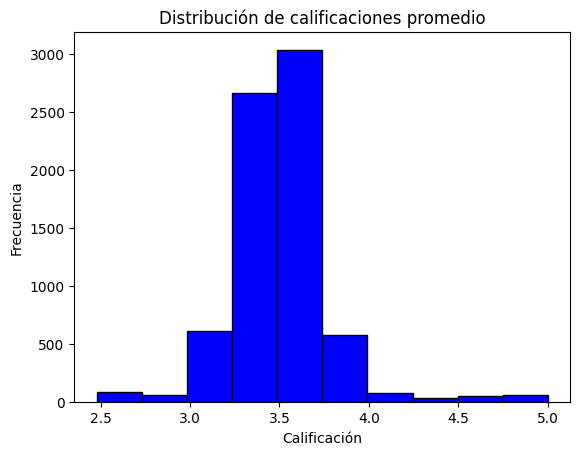

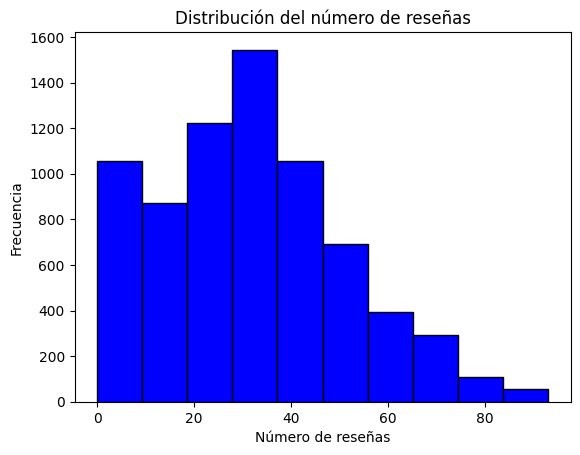

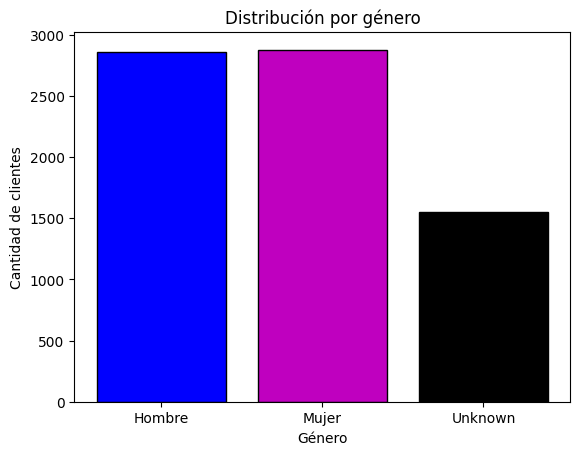

In [4]:
import matplotlib.pyplot as plt


plt.hist(df['item_price'], edgecolor='k', color='b')
plt.title('Distribución de precios de productos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

if 'customer_age' in df.columns:
    
    plt.hist(df['customer_age'], edgecolor='k', color='b')
    plt.title('Distribución de edad de los clientes')
    plt.xlabel('Edad')
    plt.ylabel('Frecuencia')
    plt.show()

if 'item_avg_rating' in df.columns:
    
    plt.hist(df['item_avg_rating'], edgecolor='k', color='b')
    plt.title('Distribución de calificaciones promedio')
    plt.xlabel('Calificación')
    plt.ylabel('Frecuencia')
    plt.show()

if 'item_num_ratings' in df.columns:
    
    plt.hist(df['item_num_ratings'], edgecolor='k', color='b')
    plt.title('Distribución del número de reseñas')
    plt.xlabel('Número de reseñas')
    plt.ylabel('Frecuencia')
    plt.show()


if 'customer_gender' in df.columns:
    
    conteo = df['customer_gender'].value_counts().sort_index()
    etiquetas = ['Hombre', 'Mujer', 'Unknown']
    plt.bar(etiquetas[:len(conteo)], conteo, color=['b','m','k'], edgecolor='k')
    plt.title('Distribución por género')
    plt.xlabel('Género')
    plt.ylabel('Cantidad de clientes')
    plt.show()


Con estas gráficas nos dimos cuenta que el consumo de productos recae en los precios de $1000 a $1500, lo que significa que si se compran productos un poco elevados.
Los clientes con más frecuencia son los de 20 y 45 años aprox. Lo que refleja que no es un público tan grande.
Son casi la misma cantidad de hombres que de mujeres.
El rating promedio es mayor a la mitad por lo que existe satisfacción por parte de los clientes.

# Tablas más específicas
Relacionadas directamente con género.

Top 5 categorías más compradas por mujeres:
 item_category
Shoes     613
Blouse    438
Jeans     353
Dress     304
Skirt     289
Name: 1, dtype: int64 

Top 5 categorías más compradas por hombres:
 item_category
Shoes      716
Jeans      552
Shirt      339
Jacket     250
T-shirt    246
Name: 0, dtype: int64 



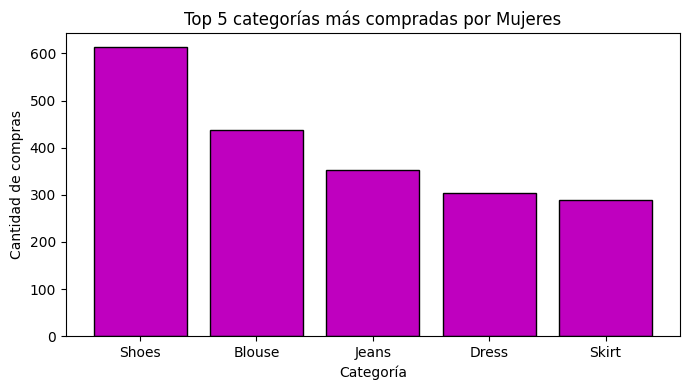

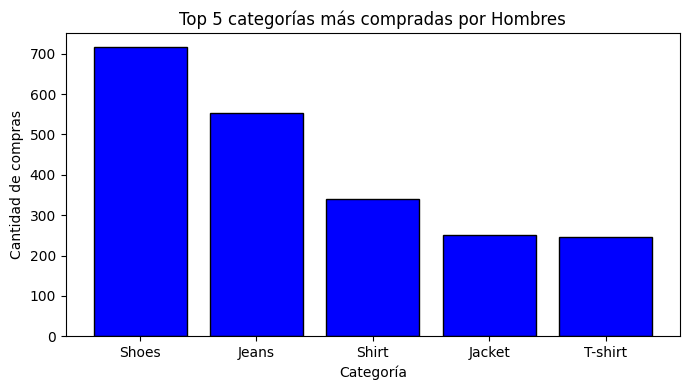

=== GASTO TOTAL Y PROMEDIO POR GÉNERO ===
                    mean         sum  count
customer_gender                            
0                1212.25  3467032.19   2860
1                1423.92  4098038.76   2878
2                1325.56  2055946.79   1551 



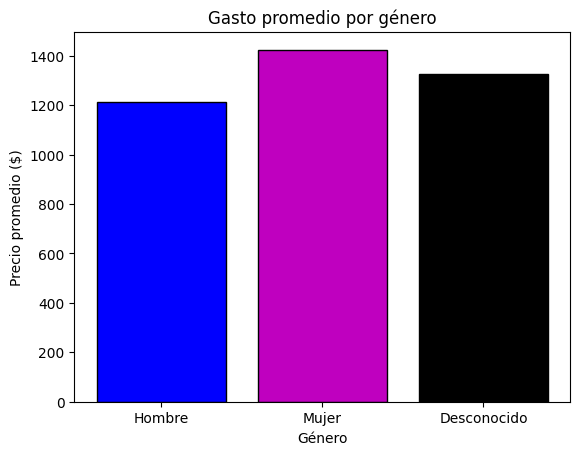

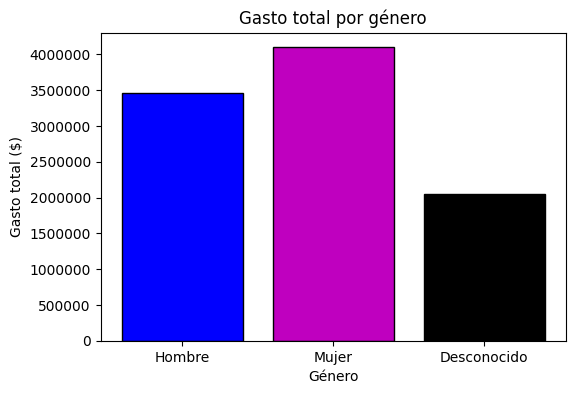

In [14]:
plt.style.use('default')

category_mapping = {
    1: 'Dress',
    2: 'Blouse',
    3: 'Skirt',
    4: 'Jacket',
    5: 'Jeans',
    6: 'Shoes',
    7: 'Shirt',
    8: 'T-shirt',
    9: 'Suit'
}

if 'item_category_num' in df.columns:
    df['item_category'] = df['item_category_num'].map(category_mapping)

if 'customer_gender' in df.columns and 'item_category' in df.columns:
    compras_por_categoria = df.groupby(['customer_gender', 'item_category']).size().unstack(fill_value=0)

    top_mujeres = compras_por_categoria.loc[1].sort_values(ascending=False).head(5) if 1 in compras_por_categoria.index else pd.Series(dtype=int)
    top_hombres = compras_por_categoria.loc[0].sort_values(ascending=False).head(5) if 0 in compras_por_categoria.index else pd.Series(dtype=int)

    print("Top 5 categorías más compradas por mujeres:\n", top_mujeres, "\n")
    print("Top 5 categorías más compradas por hombres:\n", top_hombres, "\n")

    def plot_top(serie, titulo, color):
        plt.figure(figsize=(7,4))
        plt.bar(serie.index, serie.values, color=color, edgecolor='k')
        plt.title(titulo)
        plt.xlabel('Categoría')
        plt.ylabel('Cantidad de compras')
        plt.grid(False)
        plt.tight_layout()
        plt.show()

    if not top_mujeres.empty:
        plot_top(top_mujeres, 'Top 5 categorías más compradas por Mujeres', 'm')
    if not top_hombres.empty:
        plot_top(top_hombres, 'Top 5 categorías más compradas por Hombres', 'b')

if 'item_price' in df.columns and 'customer_gender' in df.columns:
    gasto_por_genero = df.groupby('customer_gender')['item_price'].agg(['mean', 'sum', 'count']).round(2)

    print("=== GASTO TOTAL Y PROMEDIO POR GÉNERO ===")
    print(gasto_por_genero, "\n")

    etiquetas = {0: 'Hombre', 1: 'Mujer', 2: 'Desconocido'}
    idx = [etiquetas.get(i, str(i)) for i in gasto_por_genero.index]

    plt.bar(idx, gasto_por_genero['mean'], color=['b','m','k'], edgecolor='k')
    plt.title('Gasto promedio por género')
    plt.xlabel('Género')
    plt.ylabel('Precio promedio ($)')
    plt.grid(False)
    plt.show()

    plt.figure(figsize=(6,4))
    plt.bar(idx, gasto_por_genero['sum'], color=['b','m','k'], edgecolor='k')
    plt.title('Gasto total por género')
    plt.xlabel('Género')
    plt.ylabel('Gasto total ($)')
    plt.ticklabel_format(style='plain', axis='y') 
    plt.grid(False)
    plt.show()



- Tanto hombres como mujeres compran más zapatos.
- Las mujeres gastan más por compra y en general. Pero la cantidad de veces que compran no varía tanto con los hombres.


<Axes: title={'center': 'Tendencia de compras mensuales'}, xlabel='purchase_timestamp'>

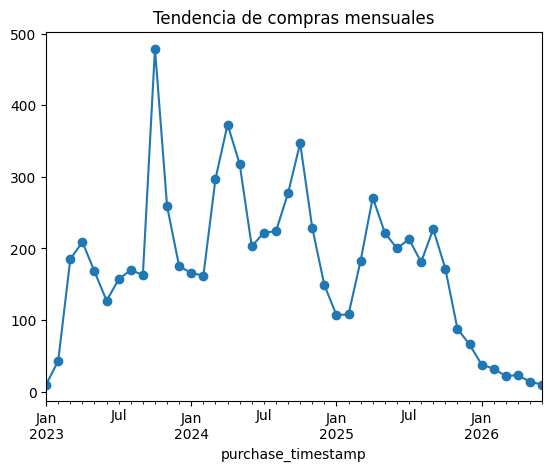

In [15]:
df['purchase_timestamp'] = pd.to_datetime(df['purchase_timestamp'])
ventas_mes = df.groupby(df['purchase_timestamp'].dt.to_period('M'))['label'].sum()
ventas_mes.plot(kind='line', marker='o', title='Tendencia de compras mensuales')


La mayoría de los picos de compra se encuentran cerca de finales de año, lo que puede significar que hay descuentos por época o cuando la gente tiene más dinero para gastar.

# Conclusiones
- Las mujeres son las mayores clientas, tanto en numero de compras como en dinero gastado.
- Los principales compradores tienen entre 20 y 40 años.
- Se compran más zapatos normalmente.
- Los productos con mayores reseñas y calificaciones es probable que tengan más éxito.
- Casi siempre se compra a final de año más.